[[95  3]
 [ 4 98]]
0.965


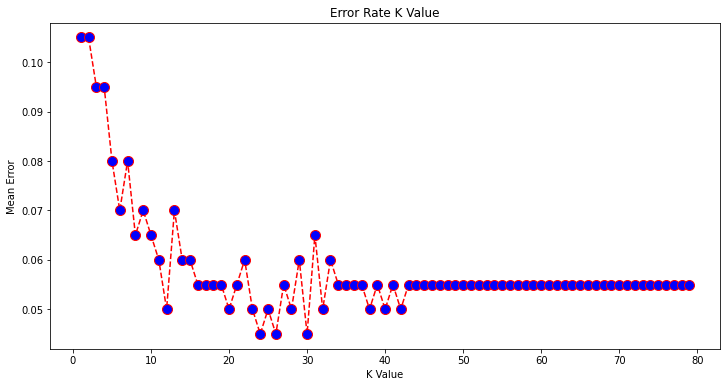

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
K=np.arange(1,50)
error=np.zeros(np.size(K))
data=pd.read_csv("Classified Data")
scaler = StandardScaler()
scaler.fit(data.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(data.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()
X = df_feat
y = data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['TARGET CLASS'],
test_size=0.40, random_state=101)
X_cv, X_test_new=np.split(X_test, 2)
Y_cv , Y_test_new=np.split(y_test, 2)
error=[]
k_range=80
for i in range(1, k_range):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_cv)
    error.append(np.mean(pred_i != Y_cv))

plt.figure(figsize=(12, 6))
plt.plot(range(1, k_range), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
best_K=np.argmin(error)
knn = KNeighborsClassifier(n_neighbors=best_K)
knn.fit(X_train,y_train)
predn = knn.predict(X_test_new)
print (confusion_matrix( Y_test_new, predn))
print(knn.score(X_test_new,  Y_test_new))